In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
import tensorflow as tf

In [24]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [25]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [26]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [27]:
for x, y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break


tf.Tensor(
[[[[172.25 135.25 126.25]
   [175.   138.   129.  ]
   [175.   138.   129.  ]
   ...
   [174.75 140.75 130.75]
   [176.25 142.25 132.25]
   [173.5  139.5  129.5 ]]

  [[171.75 134.75 125.75]
   [174.   137.   128.  ]
   [168.75 131.75 122.75]
   ...
   [169.   135.   125.  ]
   [175.   141.   131.  ]
   [172.25 138.25 128.25]]

  [[172.   135.   126.  ]
   [167.5  130.5  121.5 ]
   [163.5  126.5  117.5 ]
   ...
   [172.75 138.75 128.75]
   [178.25 144.25 134.25]
   [174.5  140.5  130.5 ]]

  ...

  [[129.5   91.5   80.5 ]
   [133.    95.    84.  ]
   [139.25 101.25  90.25]
   ...
   [131.75  97.75  85.75]
   [129.5   95.5   83.5 ]
   [136.5  102.5   90.5 ]]

  [[133.75  95.75  84.75]
   [138.5  100.5   89.5 ]
   [132.75  94.75  83.75]
   ...
   [132.25  98.25  86.25]
   [128.75  94.75  82.75]
   [127.25  93.25  81.25]]

  [[132.75  94.75  83.75]
   [133.5   95.5   84.5 ]
   [134.5   96.5   85.5 ]
   ...
   [131.75  97.75  85.75]
   [128.25  94.25  82.25]
   [133.5   99.5   8

Building Model

In [28]:
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [29]:
model =Sequential()

Convolution Layer

In [30]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size =2,strides=2))

In [31]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size =2,strides=2))

In [32]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size =2,strides=2))

In [33]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size =2,strides=2))

In [34]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size =2,strides=2))

In [35]:
model.add(Dropout(0.25))

In [36]:
model.add(Flatten())

In [37]:
model.add(Dense(units=1500,activation='relu'))

In [38]:
model.add(Dropout(0.4))

In [39]:
#output Layer
model.add(Dense(units=38,activation='softmax'))

Compiling Model

In [40]:
import tensorflow as tf

In [41]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [107]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

In [53]:
training_accuracy = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 2334s 1s/step - loss: 1.4010 - accuracy: 0.5895 - val_loss: 0.5854 - val_accuracy: 0.8183
Epoch 2/10
2197/2197 [==============================] - 2975s 1s/step - loss: 0.4443 - accuracy: 0.8575 - val_loss: 0.3024 - val_accuracy: 0.9001
Epoch 3/10
2197/2197 [==============================] - 3391s 2s/step - loss: 0.2702 - accuracy: 0.9121 - val_loss: 0.2427 - val_accuracy: 0.9215
Epoch 4/10
2197/2197 [==============================] - 3200s 1s/step - loss: 0.1808 - accuracy: 0.9411 - val_loss: 0.2334 - val_accuracy: 0.9275
Epoch 5/10
2197/2197 [==============================] - 2474s 1s/step - loss: 0.1346 - accuracy: 0.9566 - val_loss: 0.2168 - val_accuracy: 0.9340
Epoch 6/10
2197/2197 [==============================] - 2514s 1s/step - loss: 0.1045 - accuracy: 0.9648 - val_loss: 0.1584 - val_accuracy: 0.9502
Epoch 7/10
2197/2197 [==============================] - 2668s 1s/step - loss: 0.0876 - accuracy: 0.9711 - val_loss: 0.1196 -

In [55]:
train_loss, train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 859s 391ms/step - loss: 0.0886 - accuracy: 0.9738


In [56]:
print(train_loss,train_acc)

0.08859152346849442 0.9738246202468872


In [57]:
val_loss, val_acc = model.evaluate(validation_set)

550/550 [==============================] - 187s 340ms/step - loss: 0.2198 - accuracy: 0.9401


In [58]:
print(val_loss,val_acc)

0.21981701254844666 0.9400750994682312


saving model

In [108]:
import warnings
warnings.filterwarnings("ignore", message=".*UTF-8.*")


In [109]:
model.save("trained_model.h5")

C:\Users\manoy\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [110]:
model.save("trained_model.keras")

In [111]:
from keras.models import load_model

loaded_model = load_model("trained_model.keras")


In [112]:
training_accuracy.history

{'loss': [1.4009714126586914,
  0.4442574381828308,
  0.2702332139015198,
  0.18075944483280182,
  0.13455170392990112,
  0.10449410229921341,
  0.08755576610565186,
  0.07146981358528137,
  0.061256662011146545,
  0.05663615092635155],
 'accuracy': [0.5895156264305115,
  0.8574720621109009,
  0.9120990037918091,
  0.9410911202430725,
  0.9565972089767456,
  0.964762806892395,
  0.9711074829101562,
  0.976314127445221,
  0.9793868660926819,
  0.9813215732574463],
 'val_loss': [0.5854038596153259,
  0.30242523550987244,
  0.24269014596939087,
  0.23343342542648315,
  0.2168450504541397,
  0.15840329229831696,
  0.11964169889688492,
  0.10470235347747803,
  0.1489560455083847,
  0.21981698274612427],
 'val_accuracy': [0.8182904720306396,
  0.9000682830810547,
  0.921522855758667,
  0.9274982810020447,
  0.9340428113937378,
  0.9502048492431641,
  0.963464617729187,
  0.9669360518455505,
  0.958172082901001,
  0.9400750994682312]}

In [103]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_accuracy.history,f)

In [104]:
training_accuracy.history['accuracy']

[0.5895156264305115,
 0.8574720621109009,
 0.9120990037918091,
 0.9410911202430725,
 0.9565972089767456,
 0.964762806892395,
 0.9711074829101562,
 0.976314127445221,
 0.9793868660926819,
 0.9813215732574463]

Accuracy Visualization

In [76]:
import matplotlib.pyplot as plt

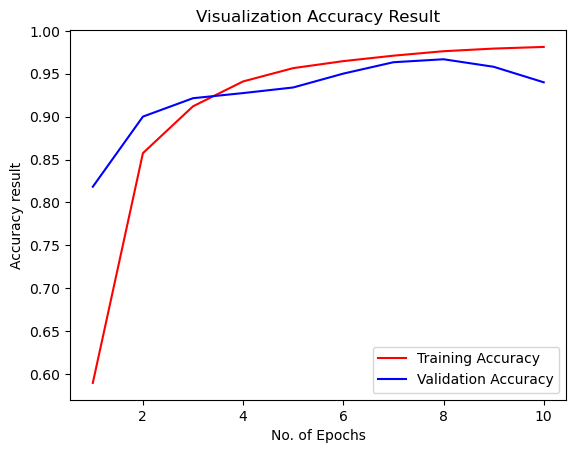

In [77]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_accuracy.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_accuracy.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy result")
plt.title('Visualization Accuracy Result')
plt.legend()
plt.show()

Some other metrics for model evaluation

In [78]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [79]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [80]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 129s 235ms/step


(array([[1.00000000e+00, 1.18959387e-09, 2.77462905e-12, ...,
         3.59956743e-18, 1.27033334e-14, 9.19979509e-15],
        [1.00000000e+00, 5.07088403e-13, 1.60653486e-14, ...,
         2.51928236e-21, 1.77880455e-18, 1.15941880e-15],
        [1.00000000e+00, 4.45554026e-15, 1.51146135e-14, ...,
         1.61287631e-24, 6.87188669e-19, 3.49080933e-15],
        ...,
        [1.35927616e-08, 4.18630061e-11, 2.36057378e-08, ...,
         1.32904732e-09, 2.92685720e-09, 9.99980092e-01],
        [1.53108900e-07, 2.37537146e-09, 1.17813016e-07, ...,
         4.82489781e-08, 1.34421052e-08, 9.99948740e-01],
        [1.18401950e-15, 3.07362912e-17, 2.53114769e-15, ...,
         6.83195467e-17, 2.60615118e-15, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [81]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [82]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [83]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [84]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [85]:
from sklearn.metrics import classification_report,confusion_matrix


In [86]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.95      0.95       504
                                 Apple___Black_rot       0.97      0.96      0.96       497
                          Apple___Cedar_apple_rust       0.97      0.90      0.93       440
                                   Apple___healthy       0.90      0.90      0.90       502
                               Blueberry___healthy       0.88      0.99      0.93       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.95      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.87      0.90       410
                       Corn_(maize)___Common_rust_       0.87      1.00      0.93       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.93      0.

In [87]:
cm =confusion_matrix(Y_true,predicted_categories)
cm

array([[477,   4,   1, ...,   0,   0,   0],
       [  0, 476,   0, ...,   0,   0,   0],
       [  0,   0, 394, ...,   1,   0,   0],
       ...,
       [  0,   0,   0, ..., 483,   0,   0],
       [  0,   0,   0, ...,   0, 444,   0],
       [  0,   0,   0, ...,   0,   1, 466]], dtype=int64)

confusion matrix visulization

In [89]:
import seaborn as sns

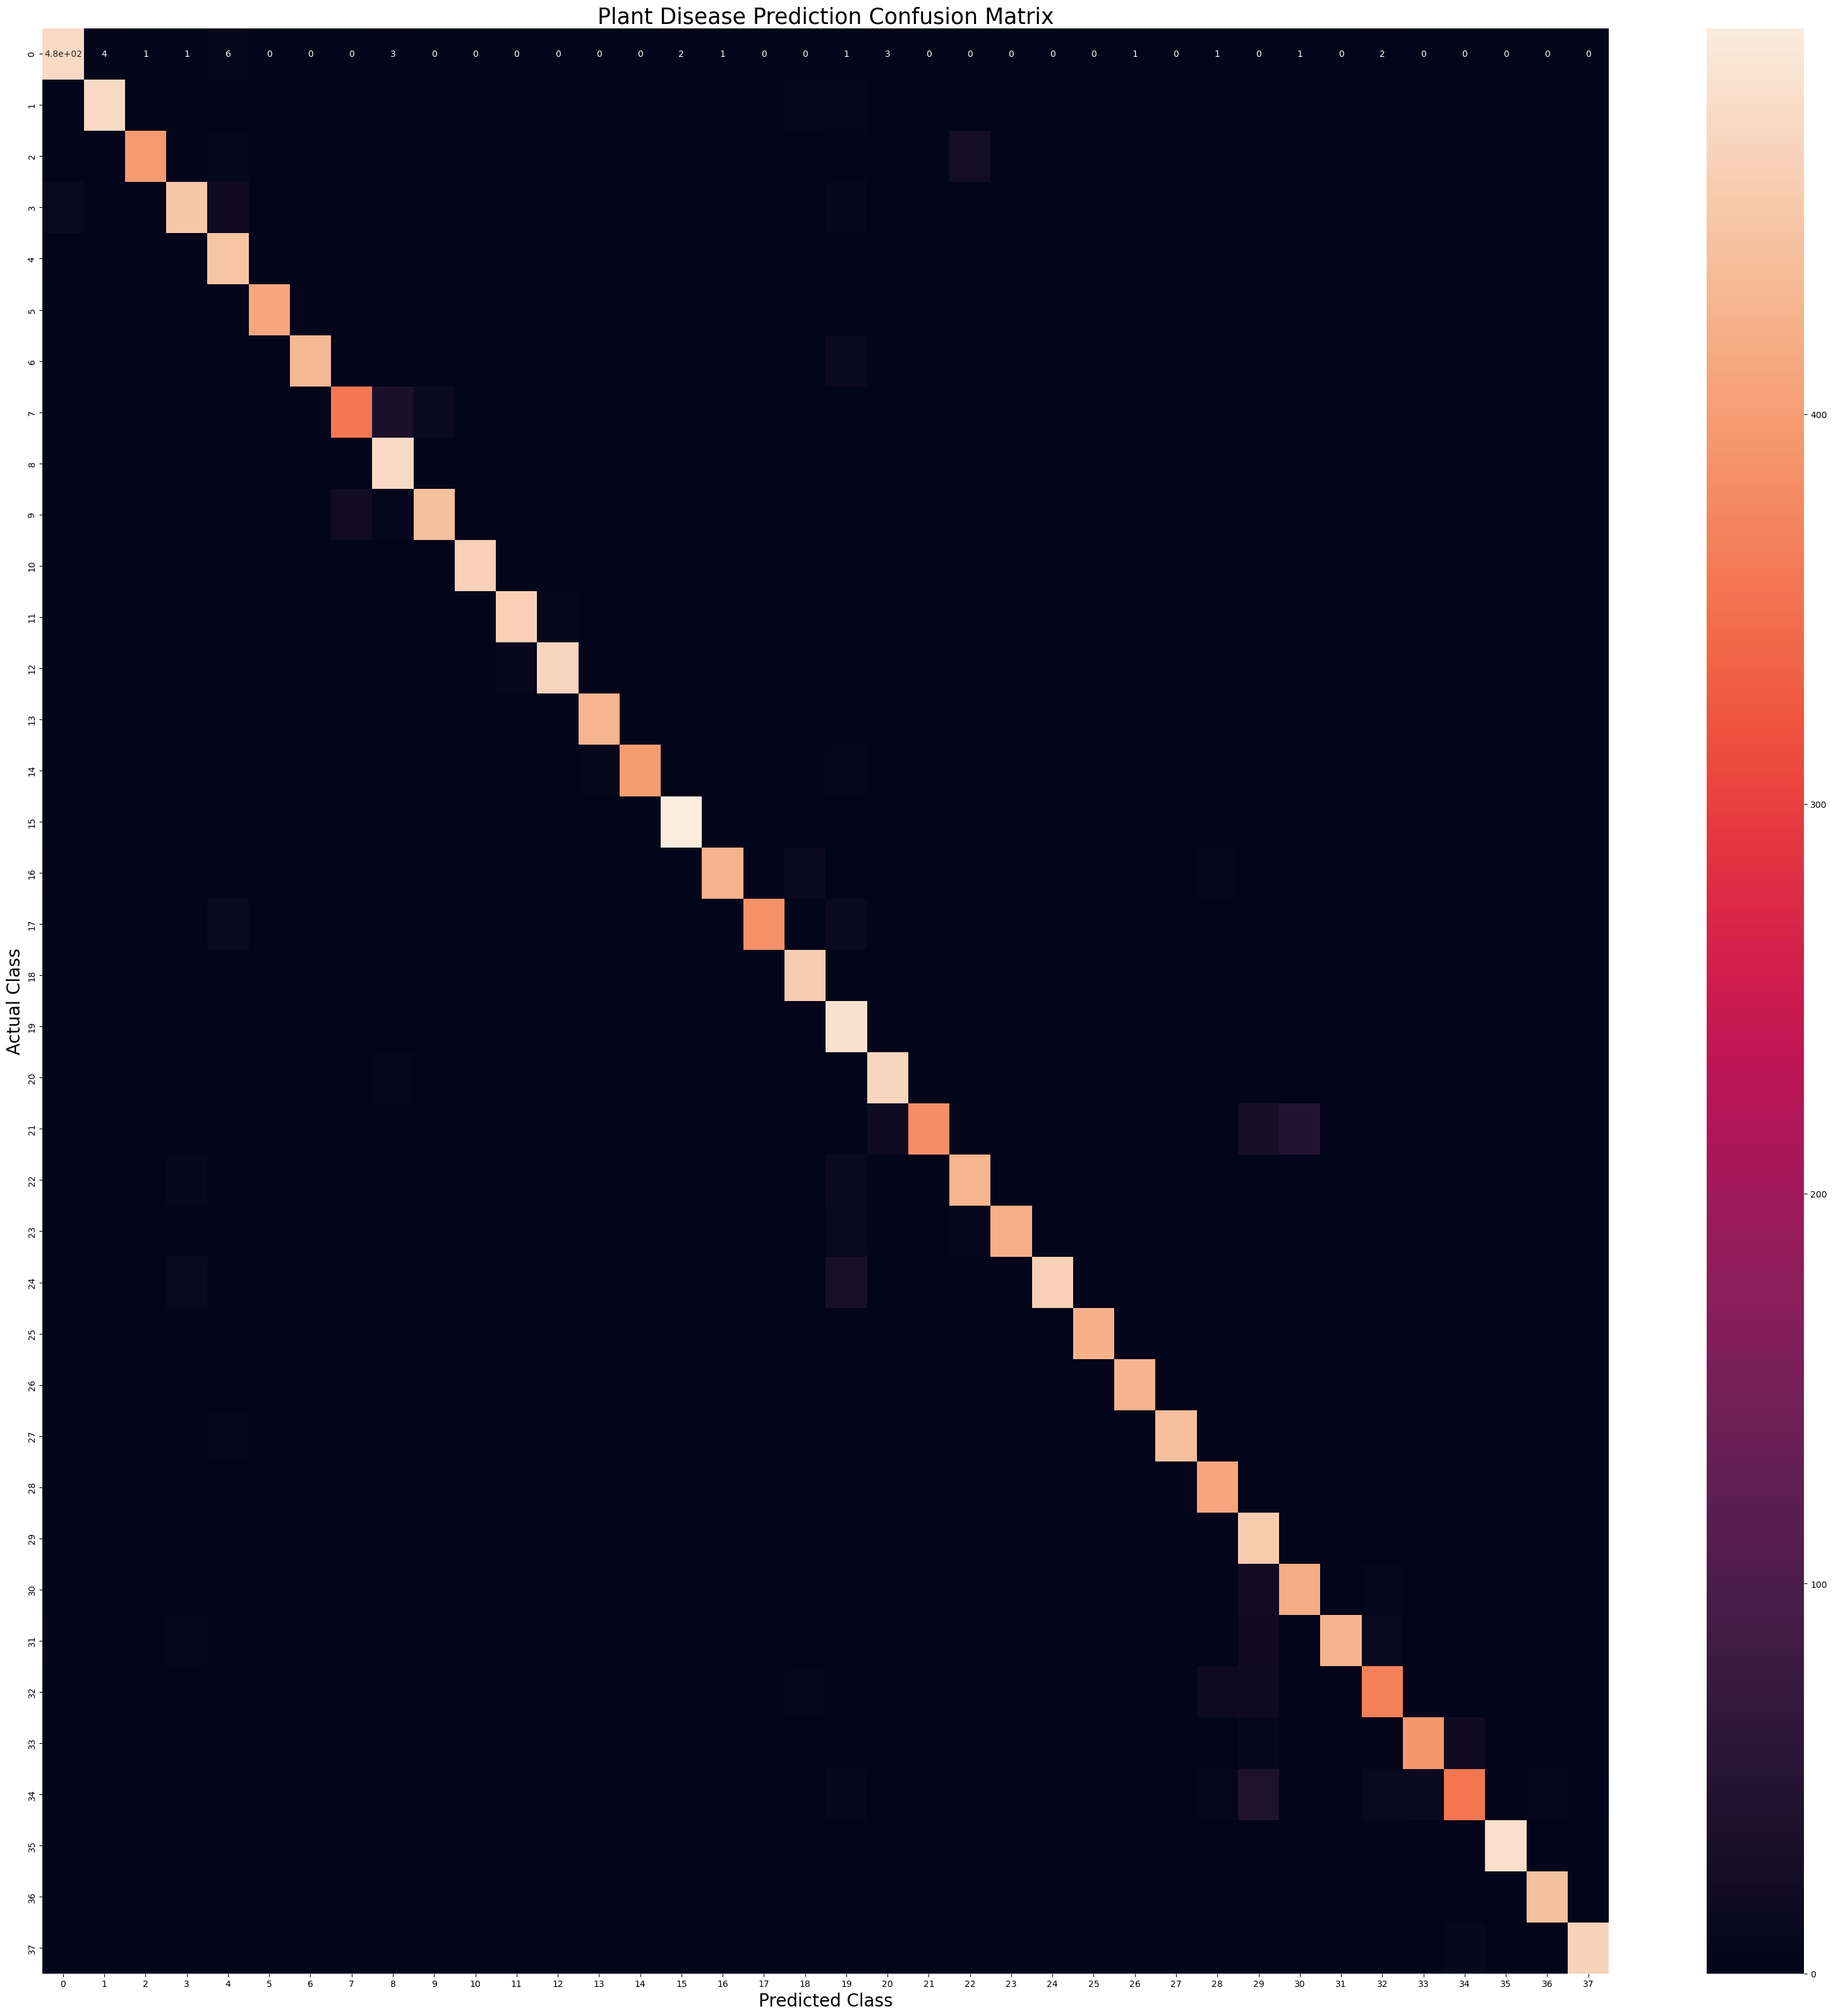

In [90]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()